Many-Body Chern Number without Integration

Koji Kudo, Haruki Watanabe, Toshikaze Kariyado, and Yasuhiro Hatsugai

Phys. Rev. Lett. 122, 146601 – Published 9 April 2019

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.146601

In [1]:
using NBInclude
@nbinclude("../../../Single Particle/Lattice_Basis_Neighbors_Hops.ipynb"; regex=r"#.*executeme")

get_Hofstadter_hamiltonian (generic function with 1 method)

In [2]:
LL = [3, 3]
N = LL[1]*LL[2]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1]
t=-1
p=1
q=3
ϕ=p/q
pbc=true
param_dict=Dict{}()
param_dict["t"]=t
param_dict["ϕ"]=ϕ
θθ = [0, 0]
param_dict["θθ"]=θθ
coordinates, sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ];
neighbors_list = [ neighbors ];

In [3]:
using QuantumOptics

## Initial Parameters

In [66]:
N1 = 50
N2 = 50
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

## Create Single-Particle Operator

In [51]:
function Op_Sp(sites,neighbors_list,
               site_number,site_coord,
               nb,LL,param_dict,pbc)

    H_T = get_Hofstadter_hamiltonian(sites,neighbors_list,
                                    site_number,site_coord,
                                    nb,LL,param_dict,pbc)
    N = LL[1]*LL[2]
    basis = NLevelBasis(N) 
    
    H = SparseOperator(basis)
    
    for m in 1:N
        for n in 1:N
            H = H + H_T[m,n] * transition(basis, m, n)
        end
    end
    
    return H
end

Op_Sp (generic function with 2 methods)

In [52]:
H_T = get_Hofstadter_hamiltonian(sites,neighbors_list,
                                site_number,site_coord,
                                length(vv_basis),LL,param_dict,pbc)

9×9 Matrix{ComplexF64}:
       0.0+0.0im            -1.0+0.0im       …        0.0+0.0im
      -1.0+0.0im             0.0+0.0im                0.0+0.0im
 -0.809017-0.587785im       -1.0+0.0im          -0.809017-0.587785im
      -1.0+0.0im             0.0+0.0im                0.0+0.0im
       0.0+0.0im            -1.0+0.0im                0.0+0.0im
       0.0+0.0im             0.0+0.0im       …       -1.0+0.0im
 -0.809017+0.587785im        0.0+0.0im           0.913545+0.406737im
       0.0+0.0im       -0.809017+0.587785im           0.5-0.866025im
       0.0+0.0im             0.0+0.0im                0.0+0.0im

In [53]:
tx = ty = 0
Op_Sp(sites,neighbors_list,
      site_number,site_coord,
      length(vv_basis),LL,param_dict,pbc)

Operator(dim=9x9)
  basis: NLevel(N=9)sparse([2, 3, 4, 7, 1, 3, 5, 8, 1, 2  …  8, 9, 2, 5, 7, 9, 3, 6, 7, 8], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3  …  7, 7, 8, 8, 8, 8, 9, 9, 9, 9], ComplexF64[-1.0 + 0.0im, -0.8090169943749473 - 0.5877852522924734im, -1.0 + 0.0im, -0.8090169943749473 + 0.5877852522924734im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -0.8090169943749473 + 0.5877852522924734im, -0.8090169943749473 + 0.5877852522924734im, -1.0 + 0.0im  …  0.5000000000000004 + 0.8660254037844386im, 0.9135454576426011 - 0.40673664307579965im, -0.8090169943749473 - 0.5877852522924734im, -1.0 + 0.0im, 0.5000000000000004 - 0.8660254037844386im, 0.5000000000000004 + 0.8660254037844386im, -0.8090169943749473 - 0.5877852522924734im, -1.0 + 0.0im, 0.9135454576426011 + 0.40673664307579965im, 0.5000000000000004 - 0.8660254037844386im], 9, 9)

## Create Many-Basis for Non-interacting system

In [54]:
function get_mb_op(PN, op)
    
    basis = NLevelBasis(N)
    states = bosonstates(basis, PN)
    basis_mb = ManyBodyBasis(basis, states)
    
    H = SparseOperator(basis_mb) 
    for m in 1:N
        for n in 1:N
            H += op.data[m,n] * transition(basis_mb, m, n)
        end
    end
    
    return H
end

get_mb_op (generic function with 1 method)

# Hamiltonian

In [55]:
function HH(sites,neighbors_list,
           site_number,site_coord,
           nb,LL,param_dict,pbc,PN)
    
    op = Op_Sp(sites,neighbors_list,
           site_number,site_coord,
           length(vv_basis),LL,param_dict,pbc)
    
    H_mb = get_mb_op(PN, op)
    
    return H_mb
end

HH (generic function with 1 method)

In [56]:
PN=2
H = HH(sites,neighbors_list,
site_number,site_coord,
length(vv_basis),LL,param_dict,pbc,PN);
eigen(dense(H).data)

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
45-element Vector{Float64}:
 -5.3686300039174935
 -5.368630003917481
 -5.368630003917479
 -5.3686300039174775
 -5.3686300039174615
 -5.3686300039174295
 -2.114064054711406
 -2.1140640547114016
 -2.1140640547114002
 -2.1140640547114
 -2.1140640547113985
 -2.114064054711397
 -2.114064054711394
  ⋮
  2.684315001958733
  2.6843150019587334
  2.6843150019587343
  2.6843150019587347
  2.684315001958737
  2.684315001958737
  4.228128109422798
  4.2281281094228
  4.2281281094228
  4.2281281094228005
  4.228128109422801
  4.228128109422802
vectors:
45×45 Matrix{ComplexF64}:
 0.00856094+0.260676im    …     0.130554+0.064714im
  0.0216278+0.187502im         0.0198763+0.122565im
  -0.124942+0.155197im        -0.0736698-0.23188im
  0.0559863+0.254053im          0.046046-0.249494im
 -0.0160901-0.00768629im      -0.0741908-0.0654222im
 -0.0116873+0.038831im    …     0.112175+0.10981im
   0.176629+0.303093im         -0.164931+0.21

# Cherns

Berry Curvature:
\begin{equation}
\mathcal{F}(\vec{\theta}) = \log \left( U_x(\vec{\theta})U_y(\vec{\theta}+\delta_x)U_x(\vec{\theta}+\delta_y)^{-1}U_y(\vec{\theta})^{-1} \right)
\end{equation}
Link variables:
\begin{equation}
U_\mu(\vec{\theta}) = \frac{
det \left( \Phi(\vec{\theta})^\dagger \Phi(\vec{\theta}+\delta_\mu) \right) 
}{
| det \left(\Phi(\vec{\theta})^\dagger \Phi(\vec{\theta}+\delta_\mu) \right) |} , \quad \delta_x = \left(\frac{2\pi}{N_{\theta}},0 \right), \delta_y = \left(0, \frac{2\pi}{N_{\theta}}\right)
\end{equation}
Chern Number:
\begin{equation}
\mathcal{C} = \frac{1}{2\pi i} \sum_{\vec{\theta}} \mathcal{F}(\vec{\theta})
\end{equation}

In [57]:
dimH = size(H)[1]

45

In [58]:
@nbinclude("../../Chern_parameter_space_sum.ipynb")

calc_F12 (generic function with 1 method)

In [59]:
Tx

49-element Vector{Float64}:
 0.0
 0.12566370614359174
 0.25132741228718347
 0.3769911184307752
 0.5026548245743669
 0.6283185307179586
 0.7539822368615504
 0.8796459430051422
 1.0053096491487339
 1.1309733552923256
 1.2566370614359172
 1.3823007675795091
 1.5079644737231008
 ⋮
 4.649557127312894
 4.775220833456486
 4.900884539600078
 5.026548245743669
 5.152211951887261
 5.277875658030853
 5.403539364174445
 5.529203070318037
 5.6548667764616285
 5.7805304826052195
 5.906194188748811
 6.031857894892403

In [60]:
EEA, UUA = calc_states_hofstadter_mb(Tx, Ty, dimH, sites,neighbors_list,
                                site_number,site_coord,
                                length(vv_basis),LL,param_dict,pbc,HH,PN);

In [61]:
UUA[1,1,:,1]'*UUA[1,1,:,2]

-1.3877787807814457e-17 + 4.163336342344337e-17im

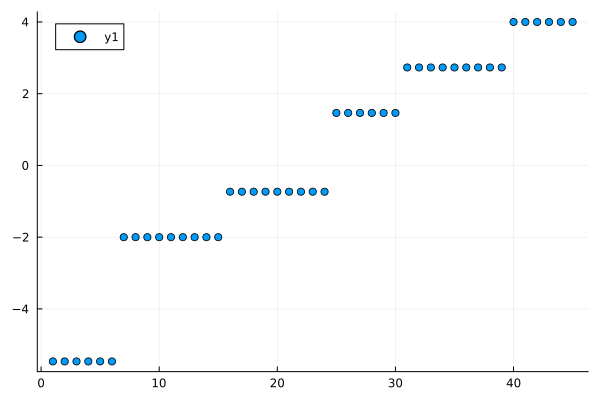

In [62]:
using Plots
scatter(real(EEA[1,1,:]))

In [63]:
bands = [[1,6], [7,15], [16,24], [25,30], [31,39], [40,45]]
bands2 = [[1,15], [16,30], [31,45]]
bands3 = [[1,24], [25,45]]

2-element Vector{Vector{Int64}}:
 [1, 24]
 [25, 45]

In [67]:
for band in bands
    UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
    F12 = calc_F12(UU)
    println(sum(F12)/(2im*pi))
end

4.000000000000001 - 1.248986582356586e-16im
-3.0 + 1.4279641226809403e-15im
-10.000000000000005 + 1.858627963817416e-15im
11.0 + 1.233968637715231e-16im
-2.999999999999999 - 6.030444456318075e-16im
4.000000000000001 - 6.368708573343733e-16im


In [68]:
for band in bands2
    UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
    F12 = calc_F12(UU)
    println(sum(F12)/(2im*pi))
end

1.0000000000000007 - 1.7293536144059384e-15im
-2.0 - 4.262460078785071e-17im
0.9999999999999996 - 1.064895913607275e-15im


In [69]:
for band in bands3
    UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
    F12 = calc_F12(UU)
    println(sum(F12)/(2im*pi))
end

-13.000000000000002 + 1.0832599629823494e-15im
13.000000000000005 - 7.430668065464061e-16im


In [20]:
using NBInclude
@nbinclude("../Hofstadter Single Particle in Theta Space.ipynb")
using QuantumOptics
using LinearAlgebra

LoadError: LoadError: cannot define function neighbors; it already has a value
in expression starting at C:\Users\Can\Downloads\Git File\Kagome-Lattice\My Numerical Calculations\Many-Body\Hofstadter\Hofstadter Single Particle in Julia.ipynb:In[129]:3
in expression starting at C:\Users\Can\Downloads\Git File\Kagome-Lattice\My Numerical Calculations\Many-Body\Hofstadter\Hofstadter Single Particle in Theta Space.ipynb:In[2]:2

In [21]:
Nx=Ny=3
N=Nx*Ny
p=1
q=Ny
alpha=p/q
PN=2
N1 = 10
N2 = 10
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

In [22]:
function Op_Sp(Nx, Ny, alpha, Tx, Ty)
    
    H_T = HSP_T(Nx, Ny, alpha, Tx, Ty, 0)
   
    N = Nx*Ny
    basis = NLevelBasis(N) 
    
    H = SparseOperator(basis)
    
    for m in 1:N
        for n in 1:N
            H = H + H_T[m,n] * transition(basis, m, n)
        end
    end
    
    return H
end

Op_Sp (generic function with 2 methods)

In [23]:
HSP_T(Nx, Ny, alpha, 0, 0, 0)

LoadError: UndefVarError: HSP_T not defined

In [24]:
op = Op_Sp(Nx, Ny, alpha, Tx[1], Ty[1]);

LoadError: UndefVarError: HSP_T not defined

In [25]:
basis = NLevelBasis(N)
states = bosonstates(basis, PN)
function get_mb_op(PN, op)
    basis = NLevelBasis(N)
    states = bosonstates(basis, PN)
    basis_mb = ManyBodyBasis(basis, states)
    
    H = SparseOperator(basis_mb) 
    for m in 1:N
        for n in 1:N
            H += op.data[m,n] * transition(basis_mb, m, n)
            #H += H_T[m,n] * transition(basis_mb, m, n)
        end
    end
    
    return H
end

get_mb_op (generic function with 1 method)

In [26]:
En, Un = eigen(dense(get_mb_op(op, PN)).data)
En

LoadError: UndefVarError: op not defined

In [27]:
using Plots
scatter(En)

LoadError: UndefVarError: En not defined

In [28]:
# executeme

function Chern_Nums(Tx, Ty, n1, n2)
    
    Sum=0
    
    for tx in range(start=1, stop=length(Tx))
        for ty in range(start=1, stop=length(Ty))
            
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx], Ty[ty])
            H_mb = get_mb_op(PN, op)
            w1, v1 = eigen(dense(H_mb).data)
            i = sortperm(w1, by=real);w1 = w1[i];v1 = v1[:,i]

            # if isapprox(v1[1,1], 0+0im, atol=0.001) == false
            #     v1 = v1 ./ v1[1,1]
            #     v1 = v1 / norm(v1)
            # end
            
            v1 = v1[:,n1:n2]
            
            #------------------------------------
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx]+dx, Ty[ty])
            H_mb = get_mb_op(PN, op)
            w2, v2 = eigen(dense(H_mb).data)
            i = sortperm(w2, by=real);w2 = w2[i];v2 = v2[:,i]

            # if isapprox(v2[1,1], 0+0im, atol=0.001) == false
            #     v2 = v2 ./ v2[1,1]
            #     v2 = v2 / norm(v2)
            # end
            
            v2 = v2[:,n1:n2]
            
            #------------------------------------
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx], Ty[ty]+dy)
            H_mb = get_mb_op(PN, op)
            w3, v3 = eigen(dense(H_mb).data)
            i = sortperm(w3, by=real);w3 = w3[i];v3 = v3[:,i]


            # if isapprox(v3[1,1], 0+0im, atol=0.001) == false
            #     v3 = v3 ./ v3[1,1]
            #     v3 = v3 / norm(v3)
            # end
            
            v3 = v3[:,n1:n2]
            
            #------------------------------------
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx]+dx, Ty[ty]+dy)
            H_mb = get_mb_op(PN, op)
            w4, v4 = eigen(dense(H_mb).data)
            i = sortperm(w4, by=real);w4 = w4[i];v4 = v4[:,i]

            # if isapprox(v4[1,1], 0+0im, atol=0.001) == false
            #     v4 = v4 ./ v4[1,1]
            #     v4 = v4 / norm(v4)
            # end
            
            v4 = v4[:,n1:n2]
            
            #----------LINK VARIABLES------------
            U1=det(adjoint(v1)*v2)
            U1=U1/abs(U1)
            U2=det(adjoint(v2)*v4)
            U2=U2/abs(U2)
            U3=det(adjoint(v3)*v4)
            U3=U3/abs(U3)
            U4=det(adjoint(v1)*v3)
            U4=U4/abs(U4)
            
            #----------BERRY CURVATURE-----------
            F=log(U1*U2*1/U3*1/U4)
            Sum=Sum+F
            
        end
    end
    
    return 1/(2*pi*1im)*Sum
end

Chern_Nums (generic function with 1 method)

In [29]:
for i in 1:Int(length(states)/Nx):length(states)
    C = Chern_Nums(Tx, Ty, i, i+(Int(length(states)/Nx))-1)
    println(C)
end

LoadError: UndefVarError: HSP_T not defined

In [30]:
Chern_Nums(Tx, Ty, 1, 6)

LoadError: UndefVarError: HSP_T not defined

In [31]:
Chern_Nums(Tx, Ty, 7, 15)

LoadError: UndefVarError: HSP_T not defined

In [32]:
Chern_Nums(Tx, Ty, 16, 24)

LoadError: UndefVarError: HSP_T not defined

In [33]:
Chern_Nums(Tx, Ty, 25, 30)

LoadError: UndefVarError: HSP_T not defined

In [34]:
Chern_Nums(Tx, Ty, 31, 39)

LoadError: UndefVarError: HSP_T not defined

In [35]:
Chern_Nums(Tx, Ty, 40, 45)

LoadError: UndefVarError: HSP_T not defined